# Using Sequential API

## Importing the major Libraries 


In [113]:
import pandas as pd 
import matplotlib as mlt 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 

## Importing the dataset 

To find more dataset from sklearn [Click here ](https://scikit-learn.org/stable/datasets.html)

we will be using the [Claifonia_housing](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) dataset for this notebook  

In [86]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

### About the dataset 

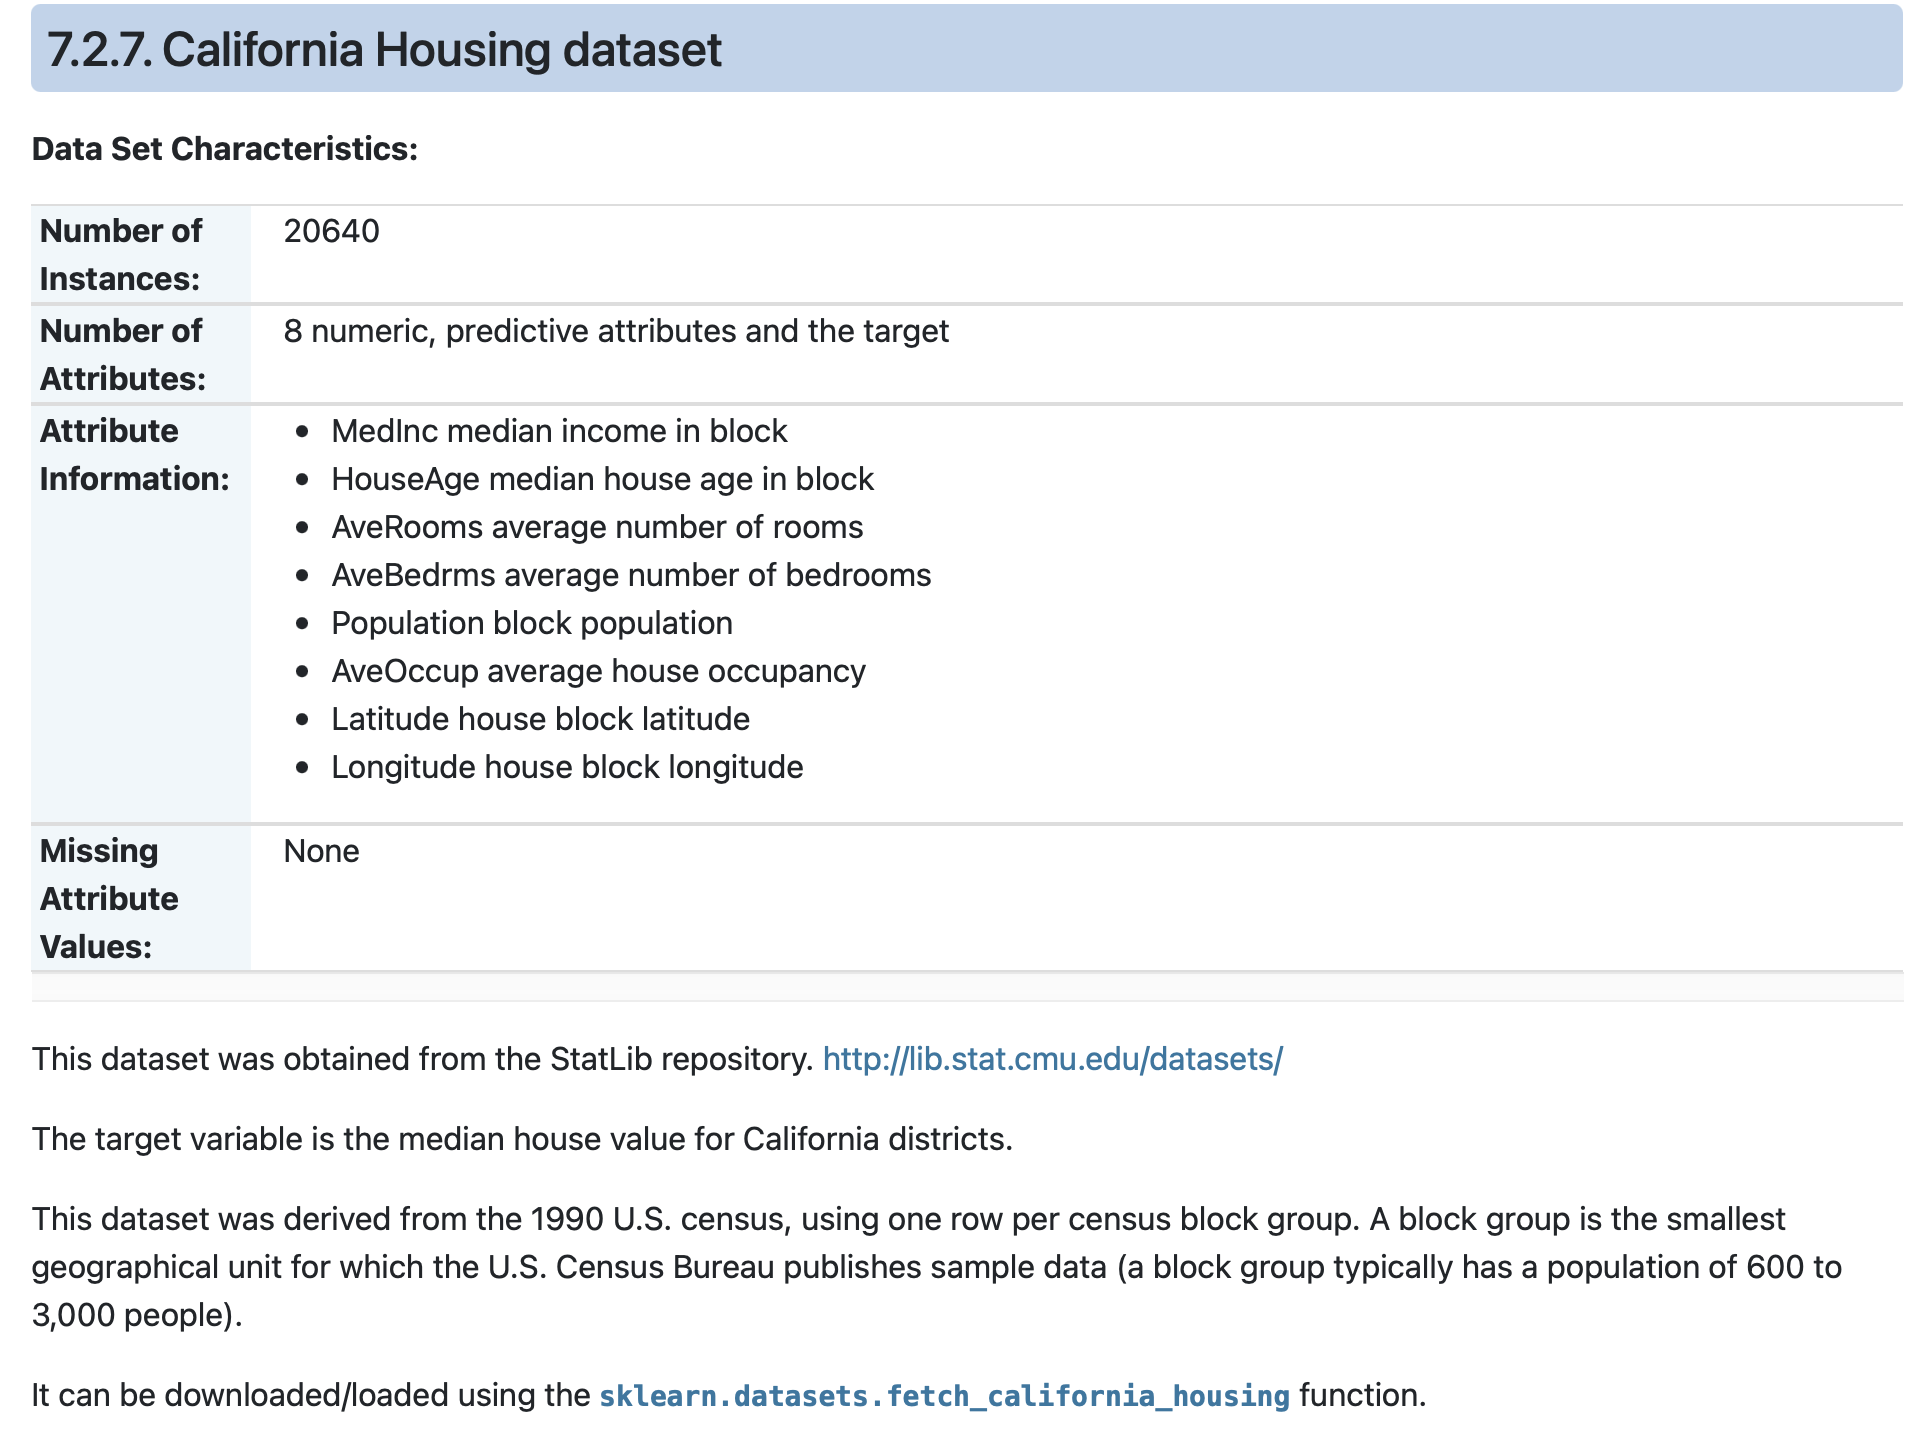

## Understanding the data 

In [87]:
print(housing_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Spliting the dataset into test, train, validation 

In [88]:
from sklearn.model_selection import train_test_split

Spiliting the **100%** data in to **75% for training** and **25% to testset** 

In [89]:
x_train ,x_test,y_train,y_test = train_test_split(housing_data.data,housing_data.target,random_state = 42)

Again spliting the 75% training data into train and validate 

In [90]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,random_state = 42)

### Standardising data

In [91]:
from sklearn.preprocessing import StandardScaler


In [92]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

In [93]:
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
print("train :",x_train.shape)
print("validate : ",x_valid.shape)
print("test :",x_test.shape)

train : (11610, 8)
validate :  (3870, 8)
test : (5160, 8)


## Buliding the Model 

In [95]:
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation='relu',input_shape= [8]))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))

In [96]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 3,051
Trainable params: 3,051
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate=1e-3),
              loss = 'mean_squared_error',
              metrics =['mae'])

## Training the data 

In [98]:
trained_model = model.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 2.0109 - mae: 1.0231 - val_loss: 0.8727 - val_mae: 0.6905
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7461 - mae: 0.6494 - val_loss: 0.6717 - val_mae: 0.6093
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6632 - mae: 0.6025 - val_loss: 0.6003 - val_mae: 0.5697
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6140 - mae: 0.5742 - val_loss: 0.6041 - val_mae: 0.5578
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5748 - mae: 0.5526 - val_loss: 0.5343 - val_mae: 0.5287
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5402 - mae: 0.5344 - val_loss: 0.5059 - val_mae: 0.5143
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5123 - mae: 0.5185 - val_loss: 0.4699 - val_mae: 0.4971
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

## Loking at Trained Model

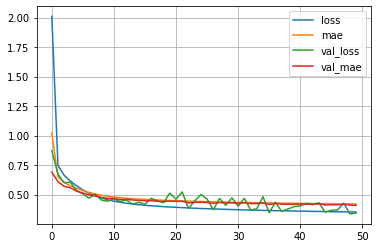

In [100]:
pd.DataFrame(trained_model.history).plot()
plt.grid(True)
plt.gca().set_lime(0,1)

## Model Evaluation 

In [99]:
model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3555 - mae: 0.4201


[0.35550665855407715, 0.42006319761276245]

In [101]:
x_new = x_test[5:8]

In [102]:
y_pred = model.predict(x_new)

In [103]:
print("The acctual values are :",y_test[5:8])
print("The predicted values are :",np.round(y_pred,3))

The acctual values are : [1.587 1.982 1.575]
The predicted values are : [[1.858]
 [2.572]
 [1.593]]


# Using Functional API



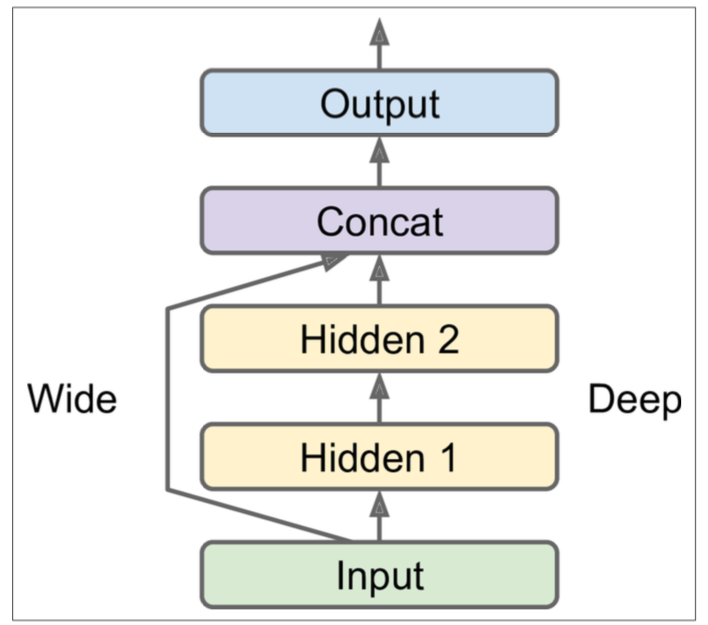



In [104]:
# deleting the model from from sequential api 
del model 

In [105]:
keras.backend.clear_session() 

Buliding the model 

In [119]:
in_input = keras.layers.Input(shape=[8])
hidden1 = keras.layers.Dense(50,activation='relu')(in_input)
hidden2 = keras.layers.Dense(50,activation='relu')(hidden1)
concat = keras.layers.concatenate([in_input,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[in_input],outputs=[output])

In [120]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 50)           450         input_11[0][0]                   
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 50)           2550        dense_27[0][0]                   
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 58)           0           input_11[0][0]                   
                                                                 dense_28[0][0]             

In [121]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              loss = 'mean_squared_error',
              metrics = ['mae'])

## Training the model 

In [122]:
trained_model = model.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.5585 - mae: 0.8790 - val_loss: 6.3611 - val_mae: 0.6821
Epoch 2/50
363/363 [==============================] - 1s 1ms/step - loss: 0.7421 - mae: 0.6208 - val_loss: 1.2661 - val_mae: 0.6092
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6358 - mae: 0.5850 - val_loss: 0.8873 - val_mae: 0.5739
Epoch 4/50
363/363 [==============================] - 1s 1ms/step - loss: 0.6025 - mae: 0.5675 - val_loss: 0.6512 - val_mae: 0.5546
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5708 - mae: 0.5502 - val_loss: 0.5392 - val_mae: 0.5307
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5467 - mae: 0.5377 - val_loss: 0.5197 - val_mae: 0.5192
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5267 - mae: 0.5259 - val_loss: 0.5305 - val_mae: 0.5114
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

# Loking the model 

(0.0, 1.0)

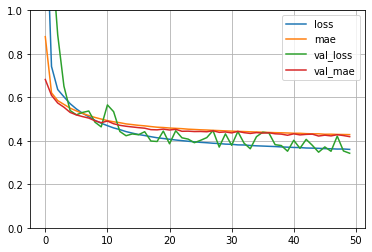

In [125]:
pd.DataFrame(trained_model.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)

## Model Evaluation 

In [123]:
model_test = model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3558 - mae: 0.4250


In [128]:
y_pred = model.predict(x_new)

In [129]:
print("The acctual values are :",y_test[5:8])
print("The predicted values are :",np.round(y_pred,3))

The acctual values are : [1.587 1.982 1.575]
The predicted values are : [[1.921]
 [2.643]
 [1.491]]
